<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga_AP155_Lab_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Arzaga, Eunine Elizze \
_Student No._: 2021-10771\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine Elizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._

The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In [33]:
# libraries and packages
import numpy as np
import matplotlib.pyplot as plt

To begin the program, we create a function that calculates the total energy of the 2D Ising model lattice.

This has parameters:
- lattice : 2D array representing the spin configuration (+1 or -1)
- J : interaction constant

This returns the total energy of the system.

In [34]:
def calculate_energy(lattice, J=1):
    energy = 0
    rows, cols = lattice.shape # 20x20 square lattice
    # calculating energy by summing contribution from neighbors
    for i in range(rows):
        for j in range(cols):
            # Summing interactions with right and bottom neighbors only to avoid double counting
            if i < rows - 1:  # bottom neighbor
                energy += lattice[i, j] * lattice[i + 1, j]
            if j < cols - 1:  # right neighbor
                energy += lattice[i, j] * lattice[i, j + 1]

    # Multiplying by the interaction constant (ferromagnetic so it's negative)
    return -J * energy #energy

In [35]:
# Example usage
np.random.seed(42)  # For reproducibility
lattice = np.random.choice([-1, 1], size=(20, 20))  # Random initial spins
energy = calculate_energy(lattice)
print("Initial total energy:", energy)

Initial total energy: -24


After computing the energy, we perform a  Metropolis Monte Carlo simulation of the Ising Model using the function metropolis_ising

This has parameters:
- lattice : initial array of spins (+1 or -1)
- T : temperature of the system
- steps : number of Monte Carlo steps
- J : interaction constant

This returns the magnetization values for each step.

In [36]:
def metropolis_ising(lattice, T, steps, J=1):
    rows, cols = lattice.shape
    magnetization = np.zeros(steps)  # tracks magnetization over time
    beta = 1 / T  # inverse temperature

    for step in range(steps):
        # randomly choosing a spin to flip
        i = np.random.randint(0, rows)
        j = np.random.randint(0, cols)

        # calculating energy change from flipping the spin
        # Formula: E = −J * s_i s_j * (right + left + down + up)
        delta_energy = 2 * J * lattice[i, j] * (
            lattice[i, (j + 1) % cols] + lattice[i, (j - 1) % cols] +
            lattice[(i + 1) % rows, j] + lattice[(i - 1) % rows, j])

        # Metropolis acceptance condition
        if delta_energy < 0 or np.random.rand() < np.exp(-beta * delta_energy):
            lattice[i, j] *= -1  # accepts the flip of spin

        # total magnetization
        magnetization[step] = np.sum(lattice)

    return magnetization

Lastly, we run multiple trials of the Ising model and overplotting them to each other to see the magnetization over time. We use the plot_magnetization function which has parameters:
- steps : number of Monte Carlo steps (100000)
- lattice_size : 20x20 (20)
- T : temperature in units where k_B = 1 (1)
- trials : number of trials to run (5)

This shows the plot of the magnetization over time for 30 trials.

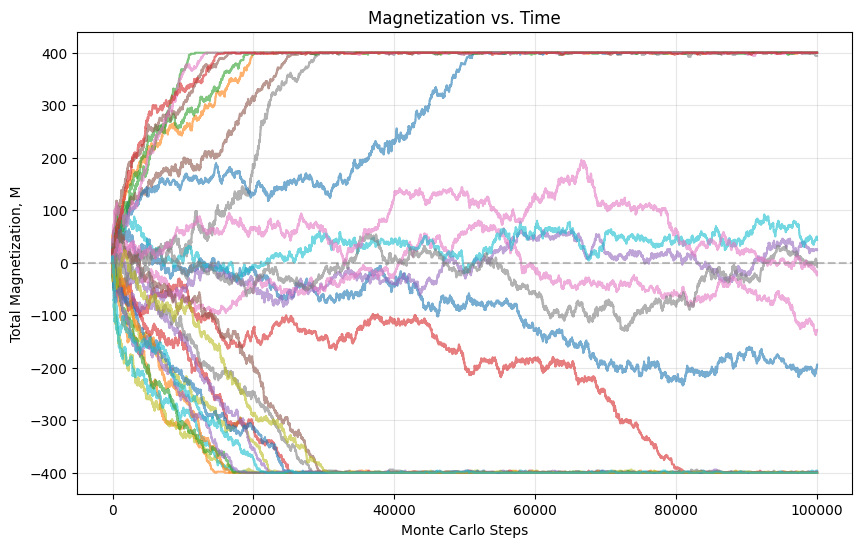

In [37]:
# Step 3: Visualization of total magnetization
def plot_magnetization(steps, lattice_size, T, trials):
    plt.figure(figsize=(10, 6))

    for trial in range(trials):
        # Initialize the lattice with random spins
        lattice = np.random.choice([-1, 1], size=(lattice_size, lattice_size))
        # Perform the Metropolis simulation
        magnetization = metropolis_ising(lattice, T=T, steps=steps)
        # Plot the magnetization
        plt.plot(range(steps), magnetization, label=f'Trial {trial+1}', alpha=0.6)

    # Annotate the plot
    plt.axhline(0, color='gray', linestyle='--', alpha=0.5, label='M = 0')
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Total Magnetization, M')
    plt.title('Magnetization vs. Time')
    plt.grid(alpha=0.3)
    plt.show()

# Run the simulation and plot results
plot_magnetization(steps=100000, lattice_size=20, T=1, trials=30)

**Analysis:**

Discussion of plot and the Ising Model
- Initially, the total magnetization \( M \) fluctuates near zero because the spins are ramdonly initialized too.
- Over time, the system evolves toward a magnetized state where most spins align, resulting in a positive ($+400$) or negative ($-400$) magnetization.
- At $ T=1 $ the ferromagnetic interaction dominates, leading to spontaneous magnetization.
- Also, at low tempertaures, thermal fluctuations cannot completely randomize the spins. This leads to a non-zero magnetization as the system favors aligned magnetic spins at $\pm 400$.

Use of Monte Carlo Method
- The spins to be flipped in the simulation is chosen randomly.
- The energy change, $ \Delta E $, due to a spin flip is calculated using the Ising energy formula,
$ E = -J \sum_{\langle ij \rangle} s_i s_j $, where $ J > 0 $ favors aligned spins.

Metropolis acceptance condition
- $ P_\text{accept} = \begin{cases} 1 & \text{if } \Delta E < 0 \\ e^{-\Delta E / T} & \text{if } \Delta E \geq 0 \end{cases} $
   - If flipping the spin reduces the energy $( \Delta E < 0 )$, it is always accepted.
   - If flipping the spin increases the energy ($ \Delta E \geq 0 $), it is accepted with a probability that decreases exponentially with $ \Delta E / T $.

- Favorable flips (lower energy) are always accepted, driving the system toward ordered states.
- Unfavorable flips are sometimes accepted, allowing the system to escape local energy minima.
  - This acceptance mechanism ensures that the system explores both lower-energy states (favoring alignment) and higher-energy states (accounting for thermal fluctuations), both of which are principles of thermodynamics.
